In [1]:

#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore") #supress warnings for readability

In [2]:
#import data files
df = pd.read_csv('FG Stuff U.csv')
df.head()

,Name,Team,IP,Stf+ FA,Stf+ SI,Stf+ FC,Stf+ FS,Stf+ SL,Stf+ CU,Stf+ CH,Stf+ KC,Stuff+,Location+,Pitching+,playerid
0,J.P. Feyereisen,TBR,24.1,95.0,NaN,NaN,NaN,107.0,NaN,100.0,NaN,100,100,104,16610
1,Tyler Kinley,COL,24.0,76.0,46.0,NaN,NaN,122.0,NaN,117.0,NaN,100,99,99,18297
2,Hunter Brown,HOU,20.1,109.0,NaN,NaN,108.0,131.0,NaN,NaN,116.0,114,100,103,25880
3,Yency Almonte,LAD,35.1,89.0,102.0,NaN,NaN,145.0,NaN,86.0,NaN,120,95,104,15068
4,Jose Cisnero,DET,25.0,98.0,87.0,NaN,NaN,102.0,NaN,75.0,NaN,94,99,98,6399


In [3]:
#import data files
pf = pd.read_csv('FG BB U.csv')
pf.head()

,Name,Team,BABIP,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,RS,...,Balls,Strikes,Pitches,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,playerid
0,Clay Holmes,NYY,0.262,6.25,12.1%,75.8%,12.1%,10.0%,10.0%,19,...,352,629,981,40.6%,41.2%,18.2%,17.0%,57.0%,26.1%,13649
1,Aaron Bummer,CHW,0.384,4.27,21.6%,63.5%,14.9%,0.0%,18.2%,9,...,185,272,457,38.7%,33.3%,28.0%,10.7%,57.3%,32.0%,16258
2,Framber Valdez,HOU,0.285,4.16,17.5%,66.5%,16.0%,9.1%,12.5%,130,...,1071,1947,3018,43.2%,36.6%,20.2%,16.2%,53.7%,30.1%,17295
3,John King,TEX,0.326,3.90,18.9%,64.6%,16.6%,3.4%,17.2%,30,...,257,492,749,40.7%,38.4%,20.9%,13.0%,55.9%,31.1%,22051
4,Andre Pallante,STL,0.311,3.69,18.8%,63.9%,17.3%,3.4%,15.3%,49,...,666,1087,1753,36.4%,30.6%,32.9%,19.5%,53.1%,27.4%,26108


In [4]:
#find null values
df.isnull().sum()

Name           0
Team           0
IP             0
Stf+ FA       36
Stf+ SI      186
Stf+ FC      371
Stf+ FS      501
Stf+ SL       94
Stf+ CU      255
Stf+ CH      127
Stf+ KC      497
Stuff+         0
Location+      0
Pitching+      0
playerid       0
dtype: int64

In [5]:
#find null values
pf.isnull().sum()

Name        0
Team        0
BABIP       0
GB/FB       0
LD%         0
GB%         0
FB%         0
IFFB%       0
HR/FB       0
RS          0
RS/9        0
Balls       0
Strikes     0
Pitches     0
Pull%       0
Cent%       0
Oppo%       0
Soft%       0
Med%        0
Hard%       0
playerid    0
dtype: int64

In [6]:
#select desired solumns
dft = df[['Name','Team','Stf+ FA','Stf+ SL','Stuff+']]
pft = pf[['Name','Team','BABIP','Hard%']]

In [7]:
#Combine the two dataframes 
md = pd.merge(left=dft, right=pft, left_on='Name', right_on='Name')

#drop second team column
md = md.drop(['Team_y'], axis=1)

md
   

,Name,Team_x,Stf+ FA,Stf+ SL,Stuff+,BABIP,Hard%
0,J.P. Feyereisen,TBR,95.0,107.0,100,0.125,32.1%
1,Tyler Kinley,COL,76.0,122.0,100,0.318,27.3%
2,Hunter Brown,HOU,109.0,131.0,114,0.294,29.4%
3,Yency Almonte,LAD,89.0,145.0,120,0.186,21.6%
4,Jose Cisnero,DET,98.0,102.0,94,0.242,29.0%
...,...,...,...,...,...,...,...
543,Sean Newcomb,- - -,73.0,NaN,91,0.316,33.3%
544,Miguel Yajure,PIT,74.0,111.0,90,0.341,35.3%
545,Dallas Keuchel,- - -,66.0,84.0,85,0.384,28.6%
546,Kohei Arihara,TEX,84.0,91.0,91,0.421,31.3%


In [8]:
#import 3 df
sf = pd.read_csv('FG Adv U.csv')
sf.head()

,Name,Team,K/9,BB/9,K/BB,HR/9,K%,BB%,K-BB%,AVG,...,LOB%,ERA-,FIP-,xFIP-,ERA,FIP,E-F,xFIP,SIERA,playerid
0,Pete Fairbanks,TBR,14.25,1.13,12.67,0.38,43.7%,3.4%,40.2%,0.155,...,89.0%,30,21,27,1.13,0.86,0.26,1.12,1.09,17998
1,Edwin Diaz,NYM,17.13,2.61,6.56,0.44,50.2%,7.7%,42.6%,0.158,...,90.4%,35,24,27,1.31,0.90,0.40,1.04,1.11,14710
2,J.P. Feyereisen,TBR,9.25,1.85,5.00,0.00,29.1%,5.8%,23.3%,0.086,...,91.7%,0,43,90,0.00,1.67,-1.67,3.56,2.93,16610
3,Chris Paddack,MIN,8.06,0.81,10.00,0.00,21.5%,2.2%,19.4%,0.278,...,64.3%,105,43,80,4.03,1.72,2.31,3.18,3.41,20099
4,Tyler Kinley,COL,10.13,2.25,4.50,0.00,27.0%,6.0%,21.0%,0.226,...,82.1%,16,42,79,0.75,1.74,-0.99,3.16,2.91,18297


In [9]:
#select desired solumns
sft = sf[['Name','Team','ERA','FIP','xFIP','SIERA','BB/9']]
sft.head()

,Name,Team,ERA,FIP,xFIP,SIERA,BB/9
0,Pete Fairbanks,TBR,1.13,0.86,1.12,1.09,1.13
1,Edwin Diaz,NYM,1.31,0.90,1.04,1.11,2.61
2,J.P. Feyereisen,TBR,0.00,1.67,3.56,2.93,1.85
3,Chris Paddack,MIN,4.03,1.72,3.18,3.41,0.81
4,Tyler Kinley,COL,0.75,1.74,3.16,2.91,2.25


In [10]:
#Combine the two dataframes
md2 = pd.merge(left=md, right=sft, left_on='Name', right_on='Name')

#drop second team column
md2 = md2.drop(['Team'], axis=1)
md2

,Name,Team_x,Stf+ FA,Stf+ SL,Stuff+,BABIP,Hard%,ERA,FIP,xFIP,SIERA,BB/9
0,J.P. Feyereisen,TBR,95.0,107.0,100,0.125,32.1%,0.00,1.67,3.56,2.93,1.85
1,Tyler Kinley,COL,76.0,122.0,100,0.318,27.3%,0.75,1.74,3.16,2.91,2.25
2,Hunter Brown,HOU,109.0,131.0,114,0.294,29.4%,0.89,1.98,2.78,2.87,3.10
3,Yency Almonte,LAD,89.0,145.0,120,0.186,21.6%,1.02,3.17,3.65,3.25,2.55
4,Jose Cisnero,DET,98.0,102.0,94,0.242,29.0%,1.08,3.67,5.09,5.19,6.84
...,...,...,...,...,...,...,...,...,...,...,...,...
547,Sean Newcomb,- - -,73.0,NaN,91,0.316,33.3%,8.78,6.91,5.07,4.79,6.18
548,Miguel Yajure,PIT,74.0,111.0,90,0.341,35.3%,8.88,5.62,5.72,5.50,5.92
549,Dallas Keuchel,- - -,66.0,84.0,85,0.384,28.6%,9.20,5.52,4.72,4.96,4.60
550,Kohei Arihara,TEX,84.0,91.0,91,0.421,31.3%,9.45,6.41,5.22,5.09,4.95


In [11]:
#visualize data to show the best pitchers in Stuff+ and FIP
md2.sort_values(by=['Stuff+','FIP'], ascending=False).head(10)

,Name,Team_x,Stf+ FA,Stf+ SL,Stuff+,BABIP,Hard%,ERA,FIP,xFIP,SIERA,BB/9
40,Felix Bautista,BAL,163.0,119.0,165,0.231,24.8%,2.19,2.91,2.77,2.49,3.15
472,Calvin Faucher,TBR,NaN,202.0,152,0.338,39.1%,5.48,5.13,4.36,4.07,4.22
28,James Karinchak,CLE,143.0,NaN,151,0.270,30.3%,2.08,2.29,3.11,2.68,4.85
88,Paul Sewald,SEA,141.0,153.0,147,0.158,29.5%,2.67,3.88,3.58,2.89,2.39
5,Pete Fairbanks,TBR,156.0,131.0,146,0.267,24.4%,1.13,0.86,1.12,1.09,1.13
7,Ryne Stanek,HOU,132.0,139.0,139,0.264,27.5%,1.15,3.02,3.95,3.85,5.10
10,Emmanuel Clase,CLE,106.0,139.0,139,0.222,19.7%,1.36,1.98,2.18,1.95,1.24
367,Aroldis Chapman,NYY,115.0,111.0,138,0.238,26.4%,4.46,4.57,4.77,4.53,6.94
79,Clay Holmes,NYY,100.0,146.0,138,0.262,26.1%,2.54,2.85,2.90,2.28,2.83
124,Ryan Pressly,HOU,106.0,168.0,137,0.260,26.9%,2.98,2.31,2.21,2.14,2.42


In [12]:
#rearange columns
md2 = md2[['Name','Team_x','Stuff+','FIP','ERA','BB/9','Stf+ SL','Stf+ FA','BABIP','Hard%','xFIP','SIERA']]

#create visual that ranks pitchers by their stuff+ and their FIP
md2 = md2.sort_values(by=['Stuff+'], ascending=False)
md2 = md2.sort_values(by=['FIP'], ascending=False)
md2 = md2.sort_values(by=['ERA'], ascending=False)

#convert K% to float
#md2['K%'] = md2['K%'].str.rstrip('%').astype('float') / 100.0


md2

,Name,Team_x,Stuff+,FIP,ERA,BB/9,Stf+ SL,Stf+ FA,BABIP,Hard%,xFIP,SIERA
551,Elvin Rodriguez,DET,96,8.30,10.62,4.55,98.0,98.0,0.333,33.3%,5.39,4.99
550,Kohei Arihara,TEX,91,6.41,9.45,4.95,91.0,84.0,0.421,31.3%,5.22,5.09
549,Dallas Keuchel,- - -,85,5.52,9.20,4.60,84.0,66.0,0.384,28.6%,4.72,4.96
548,Miguel Yajure,PIT,90,5.62,8.88,5.92,111.0,74.0,0.341,35.3%,5.72,5.50
547,Sean Newcomb,- - -,91,6.91,8.78,6.18,NaN,73.0,0.316,33.3%,5.07,4.79
...,...,...,...,...,...,...,...,...,...,...,...,...
4,Jose Cisnero,DET,94,3.67,1.08,6.84,102.0,98.0,0.242,29.0%,5.09,5.19
3,Yency Almonte,LAD,120,3.17,1.02,2.55,145.0,89.0,0.186,21.6%,3.65,3.25
2,Hunter Brown,HOU,114,1.98,0.89,3.10,131.0,109.0,0.294,29.4%,2.78,2.87
1,Tyler Kinley,COL,100,1.74,0.75,2.25,122.0,76.0,0.318,27.3%,3.16,2.91


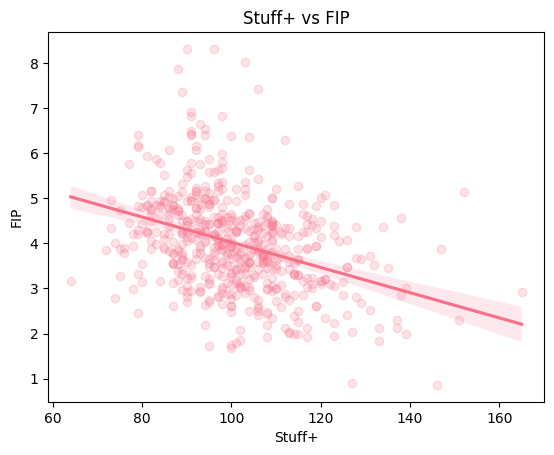

In [46]:
#scatter plot of stuff+ vs FIP

sns.regplot(x=md2['Stuff+'], y=md2['FIP'], data=md2, scatter_kws={'alpha':0.2})
plt.title('Stuff+ vs FIP')
plt.xlabel('Stuff+')
plt.ylabel('FIP')
plt.show()

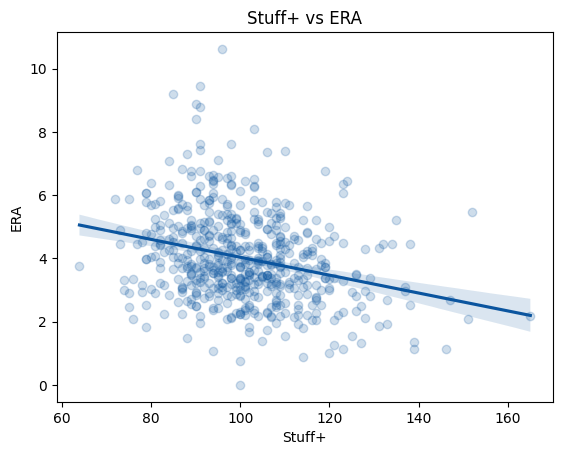

In [50]:
#scatter plot of stuff+ vs ERA
sns.set_palette("Blues_r")
sns.regplot(x=md2['Stuff+'], y=md2['ERA'], data=md2, scatter_kws={'alpha':0.2})
plt.title('Stuff+ vs ERA')
plt.xlabel('Stuff+')
plt.ylabel('ERA')
plt.show()


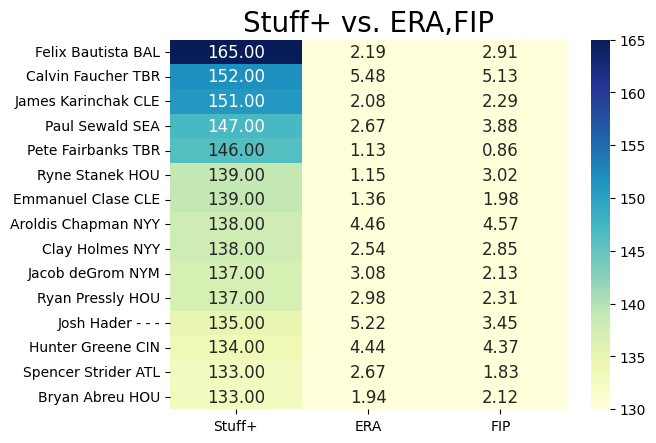

In [52]:
#rank players by stuff+
md2 = md2.sort_values(by=['Stuff+'], ascending=False)
#md2 = md2.sort_values(by=['ERA'], ascending=True)
#sns heatmap of stuff+ vs. ERA, bb/9 with name and team on y axis
hp = sns.heatmap(md2.head(15)[['Stuff+','ERA','FIP']], annot=True, annot_kws={'size': 12},fmt=".2f",vmin=130, vmax=165, cmap='YlGnBu')
#hp.set_yticklabels(md2['Name'].head(15), rotation=0)
hp.set_yticklabels(md2['Name'].head(15) + ' ' + md2['Team_x'].head(15), rotation=0)
hp.set_title('Stuff+ vs. ERA,FIP', fontsize=20)
plt.show()

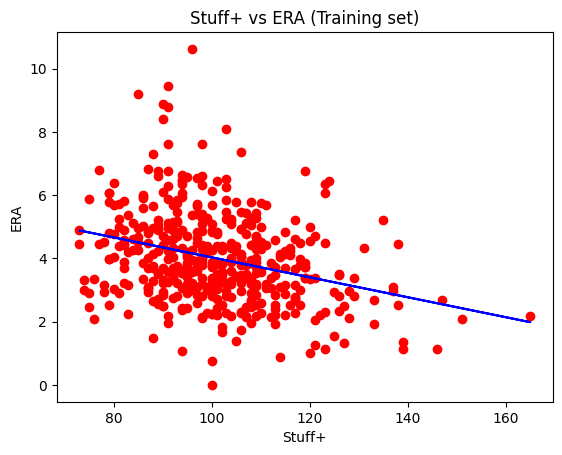

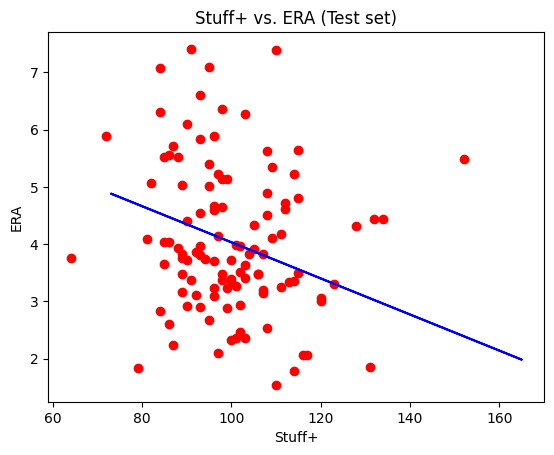

[[-0.03152683]]
[7.18422221]
Mean squared error: 1.70
Variance score: -0.02


In [58]:
#split data into training and testing
X = md2['Stuff+'].values.reshape(-1,1)
y = md2['ERA'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the test set results
y_pred = regressor.predict(X_test)

#visualize the training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Stuff+ vs ERA (Training set)')
plt.xlabel('Stuff+')
plt.ylabel('ERA')
plt.show()

#visualize the test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Stuff+ vs. ERA (Test set)')
plt.xlabel('Stuff+')
plt.ylabel('ERA')
plt.show()

#coefficients
print(regressor.coef_)
#intercept
print(regressor.intercept_)
#mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#r2 score
print('Variance score: %.2f' % r2_score(y_test, y_pred))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f0a7136-8f34-4624-a07b-c97461b60b90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>